Simple stock Trend Prediction App using streamlit: 
we will use the LSTM DL model

mount to google drive first


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as data #to scrap
import datetime as dt
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

In [3]:
#should take bigger time frame
start= '2010-01-01'
end = '2021-12-31'
df= data.DataReader('AAPL','yahoo', start=start, end=end)
df.head()
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-27,180.419998,177.070007,177.089996,180.330002,74919600.0,180.100540
2021-12-28,181.330002,178.529999,180.160004,179.289993,79144300.0,179.061859
2021-12-29,180.630005,178.139999,179.330002,179.380005,62348900.0,179.151749
2021-12-30,180.570007,178.089996,179.470001,178.199997,59773000.0,177.973251
2021-12-31,179.229996,177.259995,178.089996,177.570007,64062300.0,177.344055


In [4]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.544687
1,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.556003
2,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.451722
3,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.439795
4,2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.482609


In [21]:
df.drop(columns=['Date', 'Adj Close'])
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.544687
1,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.556003
2,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.451722
3,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.439795
4,2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.482609


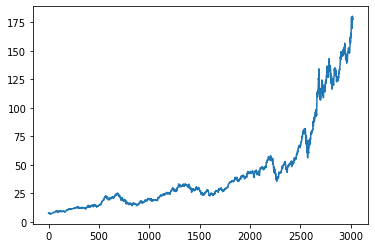

In [22]:
plt.plot(df.Close)

In [23]:
df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.544687
1,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.556003
2,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.451722
3,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.439795
4,2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.482609
...,...,...,...,...,...,...,...
3016,2021-12-27,180.419998,177.070007,177.089996,180.330002,74919600.0,180.100540
3017,2021-12-28,181.330002,178.529999,180.160004,179.289993,79144300.0,179.061859
3018,2021-12-29,180.630005,178.139999,179.330002,179.380005,62348900.0,179.151749
3019,2021-12-30,180.570007,178.089996,179.470001,178.199997,59773000.0,177.973251


In [24]:
#moving average of 100 days
ma100= df.Close.rolling(100).mean()
ma100
# first 100 are null as it calculated the mean, starts from 100 index

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3016    153.3444
3017    153.6667
3018    153.9991
3019    154.3202
3020    154.6399
Name: Close, Length: 3021, dtype: float64

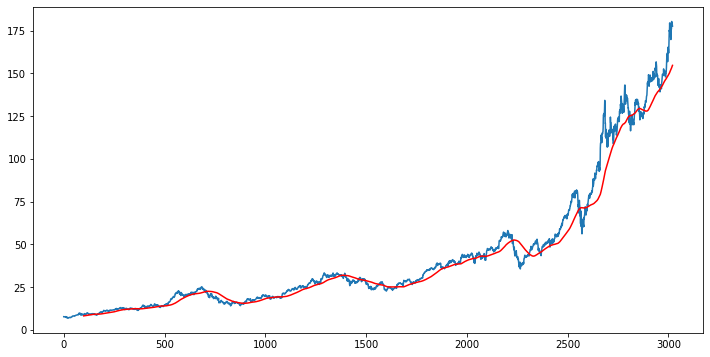

In [25]:
#plot moving average on graph
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [26]:
ma200= df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3016    142.85570
3017    143.13220
3018    143.40125
3019    143.66845
3020    143.95365
Name: Close, Length: 3021, dtype: float64

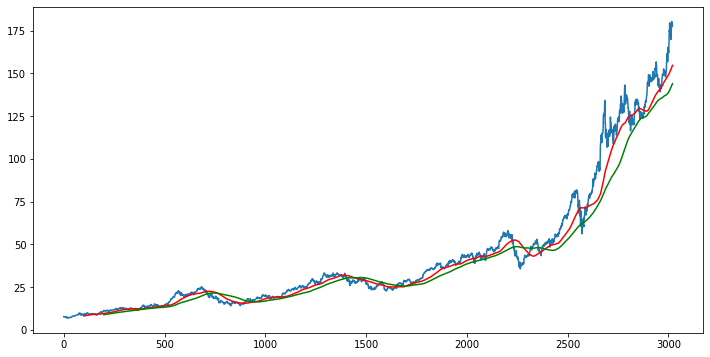

In [27]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [28]:
#split data into train and test
data_train= pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_test= pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_train.shape)
print(data_test.shape)

(2114, 1)
(907, 1)


In [29]:
data_train.head()
data_test.head()

,Close
2114,46.974998
2115,46.875000
2116,46.717499
2117,47.560001
2118,47.957500


In [30]:
#sclae down the data between 0-1
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [31]:
data_train_array= scaler.fit_transform(data_train)
data_train_array

array([[0.0192931 ],
       [0.01961817],
       [0.01662229],
       ...,
       [0.98966821],
       [0.98837669],
       [0.9910212 ]])

In [32]:
#divide data into xtrain and ytrain
#take 100 day step. first 100 days data will become the features 
#101th day is going to be ytrain
#then ytrain will be 102th day, and 101th day will be included in xtrain.
#xtrain increases at each step
x_train=[]
y_train=[]

for i in range(100, data_train_array.shape[0]):
  x_train.append(data_train_array[i-100 : i])
  y_train.append(data_train_array[i ,0]) #only considering one column

x_train, y_train = np.array(x_train), np.array(y_train)



In [33]:
# Make ML Model now
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences= True, 
               input_shape = (x_train.shape[1] , 1))) #it's 1 because we're only working with close
model.add(Dropout(0.2))


model.add(LSTM(units=60, activation='relu', return_sequences= True ))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences= True ))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1)) #only one unit, because we are only predicting one value: closing price


In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [35]:
model.compile(optimizer='adam', loss= 'mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
63/63 [==============================] - 44s 607ms/step - loss: 0.0337
Epoch 2/50
63/63 [==============================] - 38s 599ms/step - loss: 0.0074
Epoch 3/50
63/63 [==============================] - 38s 602ms/step - loss: 0.0068
Epoch 4/50
63/63 [==============================] - 37s 592ms/step - loss: 0.0061
Epoch 5/50
63/63 [==============================] - 38s 599ms/step - loss: 0.0056
Epoch 6/50
63/63 [==============================] - 37s 590ms/step - loss: 0.0052
Epoch 7/50
63/63 [==============================] - 38s 600ms/step - loss: 0.0050
Epoch 8/50
63/63 [==============================] - 37s 589ms/step - loss: 0.0054
Epoch 9/50
63/63 [==============================] - 37s 593ms/step - loss: 0.0044
Epoch 10/50
63/63 [==============================] - 37s 584ms/step - loss: 0.0044
Epoch 11/50
63/63 [==============================] - 37s 583ms/step - loss: 0.0043
Epoch 12/50
63/63 [==============================] - 37s 595ms/step - loss: 0.0040
Epoch 13/50
6

In [66]:
model.save('/content/drive/MyDrive/Colab Notebooks/stock_predict_app/keras_model.h5') 


In [53]:
data_test.head()

,Close
2114,46.974998
2115,46.875000
2116,46.717499
2117,47.560001
2118,47.957500


In [55]:
#to predict values for test data you need previous 100 days. 
#the data_training.tail(100) are the values i need to append to data.test
past_100_days=data_train.tail(100)
final_df = past_100_days.append(data_test,ignore_index=True)

In [56]:
final_df.head() #testing data

,Close
0,43.057499
1,43.257500
2,43.750000
3,43.587502
4,43.582500


In [57]:
#need to apply scaling to test data
input_data=scaler.fit_transform(final_df)
input_data

array([[0.0518709 ],
       [0.05325229],
       [0.05665394],
       ...,
       [0.99343845],
       [0.98528824],
       [0.98093696]])

In [58]:
input_data.shape

(1007, 1)

In [59]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
  x_test.append(input_data[ i-100 : i ])
  y_test.append(input_data[ i, 0 ])

x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)


(907, 100, 1)
(907,)


In [60]:
# make predictions

y_predicted = model.predict(x_test)
y_predicted.shape

(907, 1)

In [61]:
y_test


array([0.07892872, 0.07823804, 0.07715019, 0.08296929, 0.08571478,
       0.08827033, 0.08942723, 0.08852935, 0.08549029, 0.08467873,
       0.0864918 , 0.08376357, 0.08393625, 0.08055185, 0.08037919,
       0.07511267, 0.07651131, 0.07471553, 0.07378308, 0.06903458,
       0.07293697, 0.07247078, 0.07478459, 0.07411116, 0.07768548,
       0.07205635, 0.0746119 , 0.07904961, 0.08355637, 0.08315923,
       0.07889421, 0.08433339, 0.08485141, 0.08412619, 0.08505861,
       0.08324554, 0.08580112, 0.08504135, 0.0853349 , 0.08773505,
       0.0908777 , 0.0898244 , 0.08424705, 0.08239946, 0.0830556 ,
       0.10241223, 0.11258266, 0.11361871, 0.11548358, 0.11209918,
       0.11234092, 0.1151555 , 0.1128244 , 0.11513821, 0.11665774,
       0.11750385, 0.12282217, 0.13017802, 0.12651737, 0.12579212,
       0.1258094 , 0.12656917, 0.12772607, 0.13079965, 0.13383868,
       0.13950234, 0.14304214, 0.14753165, 0.14879215, 0.14621932,
       0.13970957, 0.13660145, 0.13147307, 0.14100462, 0.13620

In [62]:
y_predicted

array([[0.1596568 ],
       [0.16032304],
       [0.16091955],
       [0.16145189],
       [0.16194165],
       [0.16241963],
       [0.16290966],
       [0.16343205],
       [0.16399673],
       [0.16459364],
       [0.16520253],
       [0.16580689],
       [0.16638577],
       [0.16692035],
       [0.16738892],
       [0.16777474],
       [0.1680564 ],
       [0.16822381],
       [0.16827479],
       [0.16821319],
       [0.16803831],
       [0.16776554],
       [0.16741794],
       [0.1670237 ],
       [0.16660331],
       [0.16619569],
       [0.16581455],
       [0.16547023],
       [0.16518337],
       [0.16498297],
       [0.16488731],
       [0.16488752],
       [0.1649783 ],
       [0.16514573],
       [0.1653794 ],
       [0.16566648],
       [0.16598792],
       [0.16633055],
       [0.1666823 ],
       [0.16703255],
       [0.1673795 ],
       [0.16773205],
       [0.1680958 ],
       [0.16845605],
       [0.16878958],
       [0.16907904],
       [0.16936864],
       [0.169

In [63]:
#scale up : this gives the scaled down factor
value =scaler.scale_

In [64]:
scale_factor= 1/value
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

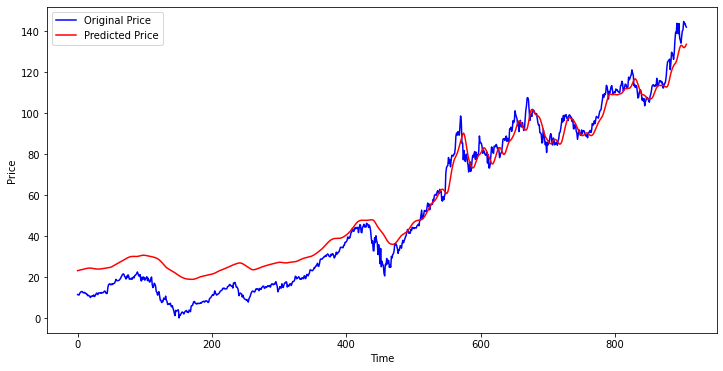

In [65]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b', label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [1]:
! cd /content/drive/MyDrive/ColabNotebooks/stock_predict_app

In [2]:
!pip install -q streamlit

     |████████████████████████████████| 10.1 MB 11.8 MB/s 
     |████████████████████████████████| 111 kB 66.0 MB/s 
     |████████████████████████████████| 181 kB 63.1 MB/s 
     |████████████████████████████████| 4.3 MB 61.7 MB/s 
     |████████████████████████████████| 76 kB 4.8 MB/s 
     |████████████████████████████████| 164 kB 71.8 MB/s 
     |████████████████████████████████| 63 kB 2.1 MB/s 
     |████████████████████████████████| 130 kB 71.0 MB/s 
     |████████████████████████████████| 793 kB 60.9 MB/s 
     |████████████████████████████████| 380 kB 44.0 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.28 which is incompatible.
google-colab 1.0.0 requires ipykernel~=4.10, but you have ipykernel 6.9.2 which is incompatible.
google-colab 1.0.0 requires ipyt

In [ ]:
!streamlit run /content/drive/MyDrive/ColabNotebooks/stock_predict_app/app.py


2022-03-24 18:18:49.909 INFO    numexpr.utils: NumExpr defaulting to 2 threads.

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.245.171.104:8501

